# Lab 8

## Part One: Binary Classification

Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

* Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

* Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

* Report the (cross-validated!) metric.

* Fit the final model.

* Output a confusion matrix.

In [1]:
import pandas as pd
cannabis = pd.read_csv(r"C:\Users\achur\OneDrive\Desktop\School\CP Fall 2024\544\cannabis_full.csv")

### Q1: LDA

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# filter for sativa and indica
filtered_cannabis = cannabis[cannabis["Type"].isin(["sativa", "indica"])]
filtered_cannabis = filtered_cannabis.dropna()

# encode to have type as numeric values
le = LabelEncoder()
filtered_cannabis["Type_encoded"] = le.fit_transform(filtered_cannabis["Type"])

# variables
X = filtered_cannabis.drop(columns=["Strain", "Type", "Type_encoded", "Effects", "Flavor"])
y = filtered_cannabis["Type_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

# pipeline to drop missing values
preprocessor = Pipeline([
    ("scaler", StandardScaler())
])

# function for models
def evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    # grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions, target_names= le.classes_)
    return grid_search.best_params_, grid_search.best_score_, conf_matrix, report

# LDA model
lda_model = LinearDiscriminantAnalysis()
lda_param_grid = {}
lda_results = evaluate_model(lda_model, lda_param_grid, X_train, y_train, X_test, y_test)

print("LDA Results")
print("Best Hyperparameters:", lda_results[0])
print("Cross-validated accuracy:", lda_results[1])
print("Confusion Matrix:\n", lda_results[2])
print("Classification Report:\n", lda_results[3])

LDA Results
Best Hyperparameters: {}
Cross-validated accuracy: 0.8548469212246301
Confusion Matrix:
 [[125   7]
 [ 23  59]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.84      0.95      0.89       132
      sativa       0.89      0.72      0.80        82

    accuracy                           0.86       214
   macro avg       0.87      0.83      0.85       214
weighted avg       0.86      0.86      0.86       214

LDA Results
Best Hyperparameters: {}
Cross-validated accuracy: 0.8548469212246301
Confusion Matrix:
 [[125   7]
 [ 23  59]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.84      0.95      0.89       132
      sativa       0.89      0.72      0.80        82

    accuracy                           0.86       214
   macro avg       0.87      0.83      0.85       214
weighted avg       0.86      0.86      0.86       214



### Q2: QDA

In [3]:
# qda model

qda_model = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda_param_grid = {}
qda_results = evaluate_model(qda_model, qda_param_grid, X_train, y_train, X_test, y_test)

print("QDA Results")
print("Best Hyperparameters:", qda_results[0])
print("Cross-validated accuracy:", qda_results[1])
print("Confusion Matrix:\n", qda_results[2])
print("Classification Report:\n", qda_results[3])
#from sklearn.decomposition import PCA
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
#import numpy as np

# PCA to fix collinearity issue 
#pca = PCA(n_components=0.95)
#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

# qda after pca
#qda_model = QuadraticDiscriminantAnalysis()

# cross-validation
#qda_cv_scores = cross_val_score(qda_model, X_train_pca, y_train, cv=5, scoring='accuracy')
#qda_model.fit(X_train_pca, y_train)
#qda_predictions = qda_model.predict(X_test_pca)

#conf_matrix = confusion_matrix(y_test, qda_predictions)
#report = classification_report(y_test, qda_predictions)

# results
#print("QDA Results")
#print("Best Hyperparameters: None")
#print(f"Cross-validated accuracy: {np.mean(qda_cv_scores):.4f}")
#print("Confusion Matrix:\n", conf_matrix)
#print("Classification Report:\n", report)

# confusion matrix
#ConfusionMatrixDisplay.from_predictions(y_test, qda_predictions, display_labels=np.unique(y_train), cmap='viridis')
#plt.title("QDA with PCA Confusion Matrix")
#plt.show()


QDA Results
Best Hyperparameters: {}
Cross-validated accuracy: 0.7728448572411419
Confusion Matrix:
 [[105  27]
 [ 16  66]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.87      0.80      0.83       132
      sativa       0.71      0.80      0.75        82

    accuracy                           0.80       214
   macro avg       0.79      0.80      0.79       214
weighted avg       0.81      0.80      0.80       214

QDA Results
Best Hyperparameters: {}
Cross-validated accuracy: 0.7728448572411419
Confusion Matrix:
 [[105  27]
 [ 16  66]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.87      0.80      0.83       132
      sativa       0.71      0.80      0.75        82

    accuracy                           0.80       214
   macro avg       0.79      0.80      0.79       214
weighted avg       0.81      0.80      0.80       214



C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Q3: SVC

In [4]:
# svc model

svc_model = SVC(probability=True, random_state=1)
svc_param_grid = {
    "classifier__C": [0.1, 1, 10],
    "classifier__kernel": ["linear", "rbf",]
}
svc_results = evaluate_model(svc_model, svc_param_grid, X_train, y_train, X_test, y_test)

print("SVC Results")
print("Best Hyperparameters:", svc_results[0])
print("Cross-validated accuracy:", svc_results[1])
print("Confusion Matrix:\n", svc_results[2])
print("Classification Report:\n", svc_results[3])

SVC Results
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Cross-validated accuracy: 0.8548675610595116
Confusion Matrix:
 [[122  10]
 [ 18  64]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.87      0.92      0.90       132
      sativa       0.86      0.78      0.82        82

    accuracy                           0.87       214
   macro avg       0.87      0.85      0.86       214
weighted avg       0.87      0.87      0.87       214

SVC Results
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Cross-validated accuracy: 0.8548675610595116
Confusion Matrix:
 [[122  10]
 [ 18  64]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.87      0.92      0.90       132
      sativa       0.86      0.78      0.82        82

    accuracy                           0.87       214
   macro avg       0.87      0.85      0.86       214
w

### Q4: SVM

In [5]:
# svm model

svm_model = SVC(kernel='poly', probability=True, random_state=1)
svm_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__degree': [2, 3, 4],
    'classifier__coef0': [0, 1],
}
svm_results = evaluate_model(svm_model, svm_param_grid, X_train, y_train, X_test, y_test)

print("SVM Results")
print("Best Hyperparameters:", svm_results[0])
print("Cross-validated accuracy:", svm_results[1])
print("Confusion Matrix:\n", svm_results[2])
print("Classification Report:\n", svm_results[3])

SVM Results
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__coef0': 1, 'classifier__degree': 4}
Cross-validated accuracy: 0.8618507051943585
Confusion Matrix:
 [[124   8]
 [ 21  61]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.86      0.94      0.90       132
      sativa       0.88      0.74      0.81        82

    accuracy                           0.86       214
   macro avg       0.87      0.84      0.85       214
weighted avg       0.87      0.86      0.86       214

SVM Results
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__coef0': 1, 'classifier__degree': 4}
Cross-validated accuracy: 0.8618507051943585
Confusion Matrix:
 [[124   8]
 [ 21  61]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.86      0.94      0.90       132
      sativa       0.88      0.74      0.81        82

    accuracy                           0.86       214
   macro avg       0.

I chose the accuracy metric because it does not account for only one category. It takes into account the ratio of number of correct predictions and total number of predictions. 

## Part Two: Natural Multiclass
Now use the full dataset, including the Hybrid strains.

### Q1: Fit a decision tree, plot the final fit, and interpret the results.

Decision Tree
Decision Tree


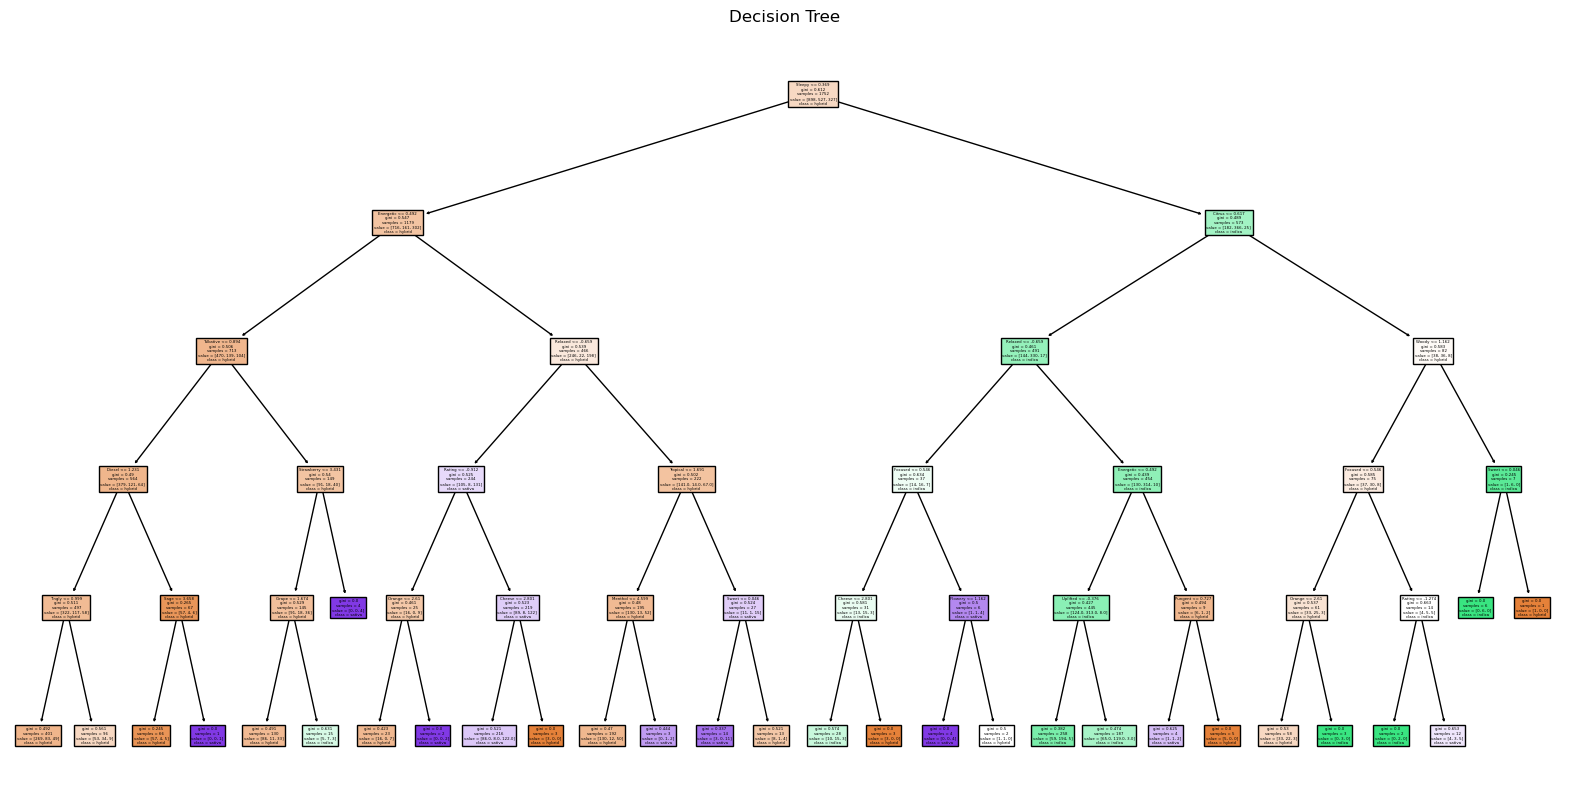

Decision Tree Classification Report:
               precision    recall  f1-score   support

      hybrid       0.62      0.69      0.65       225
      indica       0.65      0.61      0.63       132
      sativa       0.46      0.38      0.42        82

    accuracy                           0.61       439
   macro avg       0.58      0.56      0.57       439
weighted avg       0.60      0.61      0.60       439

Decision Tree Classification Report:
               precision    recall  f1-score   support

      hybrid       0.62      0.69      0.65       225
      indica       0.65      0.61      0.63       132
      sativa       0.46      0.38      0.42        82

    accuracy                           0.61       439
   macro avg       0.58      0.56      0.57       439
weighted avg       0.60      0.61      0.60       439



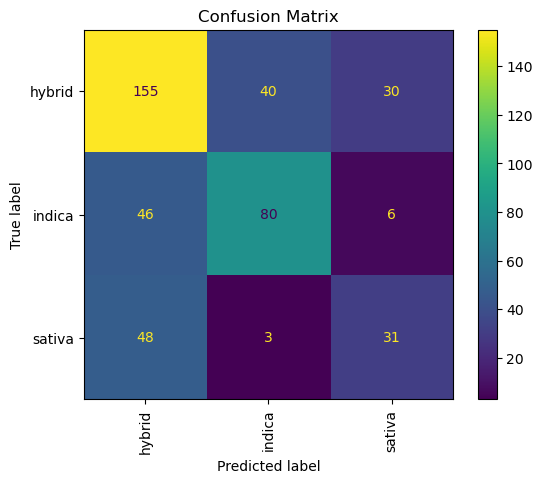

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# encode variable
le = LabelEncoder()
cannabis["Type_encoded"] = le.fit_transform(cannabis["Type"])

# variables
cannabis = cannabis.dropna()
X = cannabis.drop(columns = ["Strain", "Type", "Type_encoded", "Effects", "Flavor"])
y = cannabis["Type_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)

# pipeline
preprocessor = Pipeline([
    ("scaler", StandardScaler())
])

# function to plot confusion matrix
def plot_conf_matrix(model, X_test, y_test, labels):
    predictions = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(
        y_test, predictions, display_labels=labels, cmap="viridis", xticks_rotation="vertical"
    )
    plt.title("Confusion Matrix")
    plt.show

def tune_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, labels):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions, target_names=labels)
    return grid_search.best_params_, grid_search.best_score_, conf_matrix, report, best_model

print("Decision Tree")
tree_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=1, max_depth=5))
])
tree_model.fit(X_train, y_train)

# decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model.named_steps['classifier'], feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree")
plt.show()

# confusion matrix and report results
plot_conf_matrix(tree_model, X_test, y_test, labels=le.classes_)
tree_predictions = tree_model.predict(X_test)
tree_report = classification_report(y_test, tree_predictions, target_names=le.classes_)
print("Decision Tree Classification Report:\n", tree_report)

### Q2: Repeat the analyses from Part One for LDA, QDA, and KNN.

LDA
LDA Results
Best Hyperparameters: {}
Cross-validated accuracy: 0.6278502238502239
Confusion Matrix:
 [[147  46  32]
 [ 41  88   3]
 [ 42   3  37]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.64      0.65      0.65       225
      indica       0.64      0.67      0.65       132
      sativa       0.51      0.45      0.48        82

    accuracy                           0.62       439
   macro avg       0.60      0.59      0.59       439
weighted avg       0.62      0.62      0.62       439

LDA
LDA Results
Best Hyperparameters: {}
Cross-validated accuracy: 0.6278502238502239
Confusion Matrix:
 [[147  46  32]
 [ 41  88   3]
 [ 42   3  37]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.64      0.65      0.65       225
      indica       0.64      0.67      0.65       132
      sativa       0.51      0.45      0.48        82

    accuracy                           0.62       4

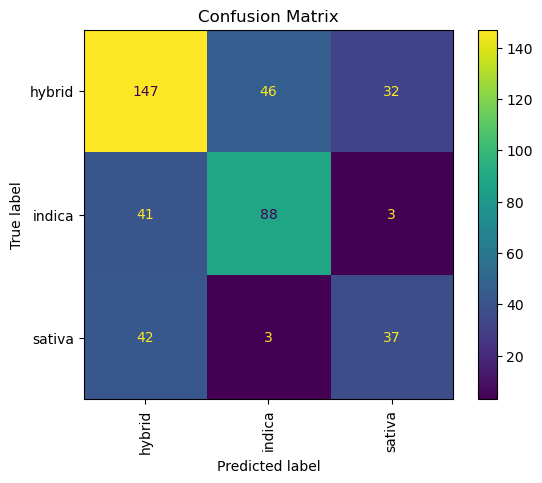

In [7]:
# lda

print("LDA")
lda_model = LinearDiscriminantAnalysis()
lda_param_grid = {} 
lda_results = tune_and_evaluate_model(lda_model, lda_param_grid, X_train, y_train, X_test, y_test, labels=le.classes_)

print("LDA Results")
print("Best Hyperparameters:", lda_results[0])
print("Cross-validated accuracy:", lda_results[1])
print("Confusion Matrix:\n", lda_results[2])
print("Classification Report:\n", lda_results[3])
plot_conf_matrix(lda_results[4], X_test, y_test, labels=le.classes_)

QDA
QDA Results
Best Hyperparameters: {}
Cross-validated accuracy: 0.2865510785510786
Confusion Matrix:
 [[ 18   6 201]
 [ 14  11 107]
 [  7   1  74]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.46      0.08      0.14       225
      indica       0.61      0.08      0.15       132
      sativa       0.19      0.90      0.32        82

    accuracy                           0.23       439
   macro avg       0.42      0.36      0.20       439
weighted avg       0.46      0.23      0.17       439

QDA
QDA Results
Best Hyperparameters: {}
Cross-validated accuracy: 0.2865510785510786
Confusion Matrix:
 [[ 18   6 201]
 [ 14  11 107]
 [  7   1  74]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.46      0.08      0.14       225
      indica       0.61      0.08      0.15       132
      sativa       0.19      0.90      0.32        82

    accuracy                           0.23       4

C:\Users\achur\Downloads\python\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


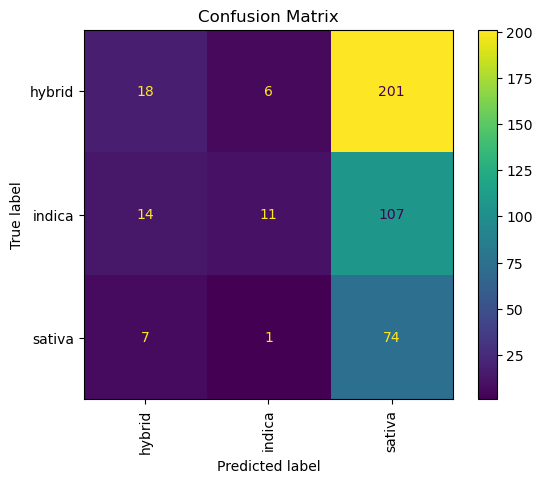

In [8]:
#qda 
print("QDA")
qda_model = QuadraticDiscriminantAnalysis()
qda_param_grid = {} 
qda_results = tune_and_evaluate_model(qda_model, qda_param_grid, X_train, y_train, X_test, y_test, labels=le.classes_)

print("QDA Results")
print("Best Hyperparameters:", qda_results[0])
print("Cross-validated accuracy:", qda_results[1])
print("Confusion Matrix:\n", qda_results[2])
print("Classification Report:\n", qda_results[3])
plot_conf_matrix(qda_results[4], X_test, y_test, labels=le.classes_)


KNN
KNN


KNN Results
Best Hyperparameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Cross-validated accuracy: 0.6038778998778999
Confusion Matrix:
 [[167  36  22]
 [ 69  61   2]
 [ 48   8  26]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.59      0.74      0.66       225
      indica       0.58      0.46      0.51       132
      sativa       0.52      0.32      0.39        82

    accuracy                           0.58       439
   macro avg       0.56      0.51      0.52       439
weighted avg       0.57      0.58      0.56       439

KNN Results
Best Hyperparameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Cross-validated accuracy: 0.6038778998778999
Confusion Matrix:
 [[167  36  22]
 [ 69  61   2]
 [ 48   8  26]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.59     

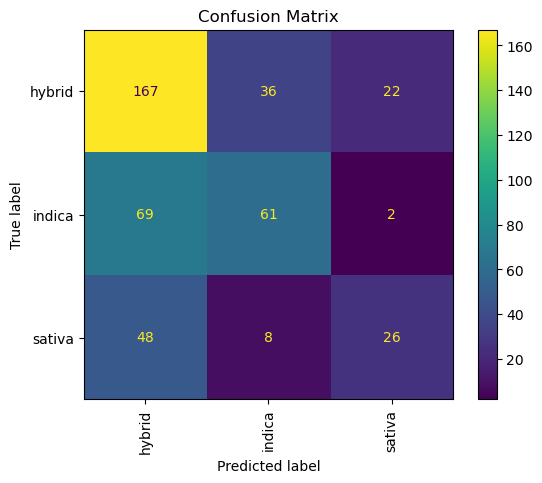

In [9]:
# knn
print("KNN")
knn_model = KNeighborsClassifier()
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}
knn_results = tune_and_evaluate_model(knn_model, knn_param_grid, X_train, y_train, X_test, y_test, labels=le.classes_)

print("KNN Results")
print("Best Hyperparameters:", knn_results[0])
print("Cross-validated accuracy:", knn_results[1])
print("Confusion Matrix:\n", knn_results[2])
print("Classification Report:\n", knn_results[3])
plot_conf_matrix(knn_results[4], X_test, y_test, labels=le.classes_)

### Q3: Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

The accuracy metrics and the F1 scores in part one were higher in part one and than in part two. This is because part two also included the thrid type of strain, hybrid. Because the hybrid strain is a mix of indica and sativa, it can cause overlap. In part one, the misclassification were relatively balanced between indica and sativa because they are two different strains. In part two, there is significant mixing between hybrid being misclassified as sativa, indica being classified as hybrid, and sativa being classified as hybrid. This is because the hybrid strain shares similar features with both indica and sativa which can cause confusion in the models.


## Part Three: Multiclass from Binary 
Consider two models designed for binary classification: SVC and Logistic Regression.

### Q1: Fit and report metrics for OvR versions of the models. That is, for each of the two model types, create three models:
* Indica vs. Not Indica

* Sativa vs. Not Sativa

* Hybrid vs. Not Hybrid


Training SVC for: hybrid vs Not hybrid


Training SVC for: hybrid vs Not hybrid


Confusion Matrix: 
 [[ 99 115]
 [ 60 165]]
Classification Report: 
               precision    recall  f1-score   support

      hybrid       0.62      0.46      0.53       214
  Not hybrid       0.59      0.73      0.65       225

    accuracy                           0.60       439
   macro avg       0.61      0.60      0.59       439
weighted avg       0.61      0.60      0.59       439

Confusion Matrix: 
 [[ 99 115]
 [ 60 165]]
Classification Report: 
               precision    recall  f1-score   support

      hybrid       0.62      0.46      0.53       214
  Not hybrid       0.59      0.73      0.65       225

    accuracy                           0.60       439
   macro avg       0.61      0.60      0.59       439
weighted avg       0.61      0.60      0.59       439



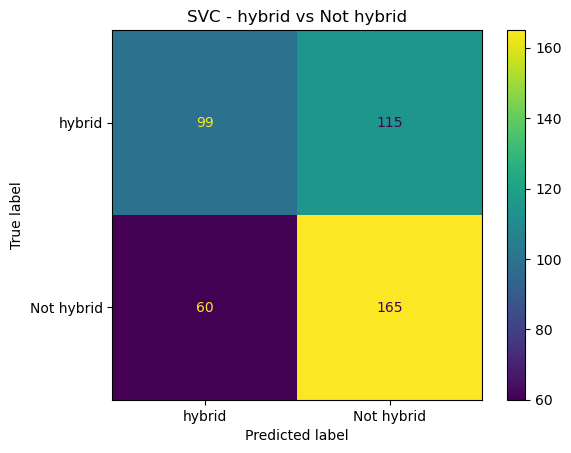


Training SVC for: indica vs Not indica


Training SVC for: indica vs Not indica


Confusion Matrix: 
 [[252  55]
 [ 43  89]]
Classification Report: 
               precision    recall  f1-score   support

      indica       0.85      0.82      0.84       307
  Not indica       0.62      0.67      0.64       132

    accuracy                           0.78       439
   macro avg       0.74      0.75      0.74       439
weighted avg       0.78      0.78      0.78       439

Confusion Matrix: 
 [[252  55]
 [ 43  89]]
Classification Report: 
               precision    recall  f1-score   support

      indica       0.85      0.82      0.84       307
  Not indica       0.62      0.67      0.64       132

    accuracy                           0.78       439
   macro avg       0.74      0.75      0.74       439
weighted avg       0.78      0.78      0.78       439



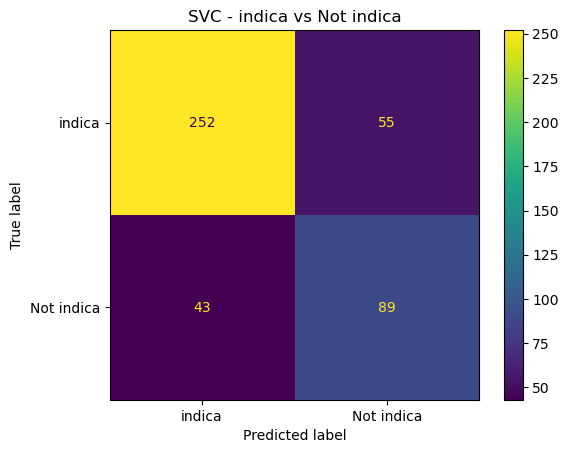


Training SVC for: sativa vs Not sativa


Training SVC for: sativa vs Not sativa


Confusion Matrix: 
 [[356   1]
 [ 82   0]]
Classification Report: 
               precision    recall  f1-score   support

      sativa       0.81      1.00      0.90       357
  Not sativa       0.00      0.00      0.00        82

    accuracy                           0.81       439
   macro avg       0.41      0.50      0.45       439
weighted avg       0.66      0.81      0.73       439

Confusion Matrix: 
 [[356   1]
 [ 82   0]]
Classification Report: 
               precision    recall  f1-score   support

      sativa       0.81      1.00      0.90       357
  Not sativa       0.00      0.00      0.00        82

    accuracy                           0.81       439
   macro avg       0.41      0.50      0.45       439
weighted avg       0.66      0.81      0.73       439



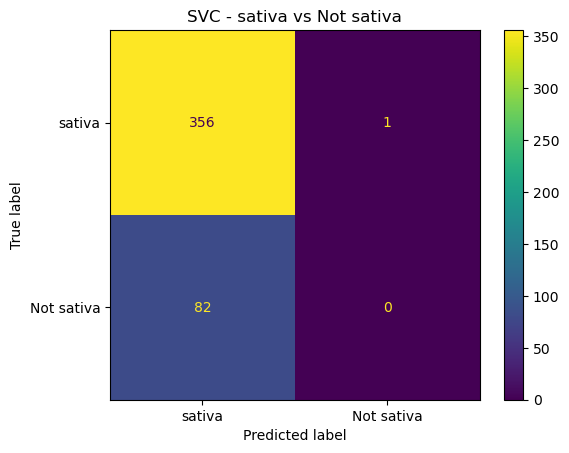


Training Logistic Regression for: hybrid vs Not hybrid
Confusion Matrix: 
 [[122  92]
 [ 80 145]]
Classification Report: 
               precision    recall  f1-score   support

      hybrid       0.60      0.57      0.59       214
  Not hybrid       0.61      0.64      0.63       225

    accuracy                           0.61       439
   macro avg       0.61      0.61      0.61       439
weighted avg       0.61      0.61      0.61       439



Training Logistic Regression for: hybrid vs Not hybrid
Confusion Matrix: 
 [[122  92]
 [ 80 145]]
Classification Report: 
               precision    recall  f1-score   support

      hybrid       0.60      0.57      0.59       214
  Not hybrid       0.61      0.64      0.63       225

    accuracy                           0.61       439
   macro avg       0.61      0.61      0.61       439
weighted avg       0.61      0.61      0.61       439



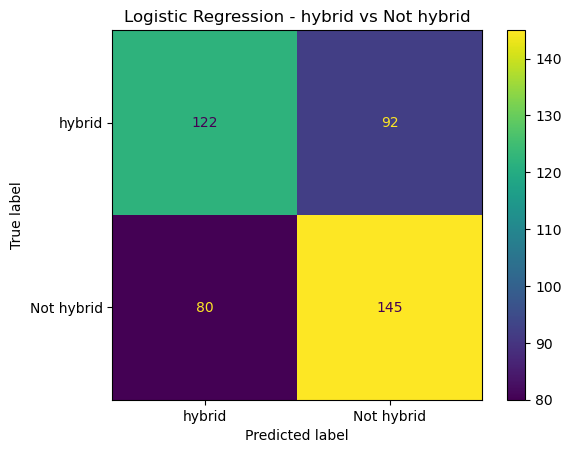


Training Logistic Regression for: indica vs Not indica
Confusion Matrix: 
 [[270  37]
 [ 54  78]]
Classification Report: 
               precision    recall  f1-score   support

      indica       0.83      0.88      0.86       307
  Not indica       0.68      0.59      0.63       132

    accuracy                           0.79       439
   macro avg       0.76      0.74      0.74       439
weighted avg       0.79      0.79      0.79       439



Training Logistic Regression for: indica vs Not indica
Confusion Matrix: 
 [[270  37]
 [ 54  78]]
Classification Report: 
               precision    recall  f1-score   support

      indica       0.83      0.88      0.86       307
  Not indica       0.68      0.59      0.63       132

    accuracy                           0.79       439
   macro avg       0.76      0.74      0.74       439
weighted avg       0.79      0.79      0.79       439



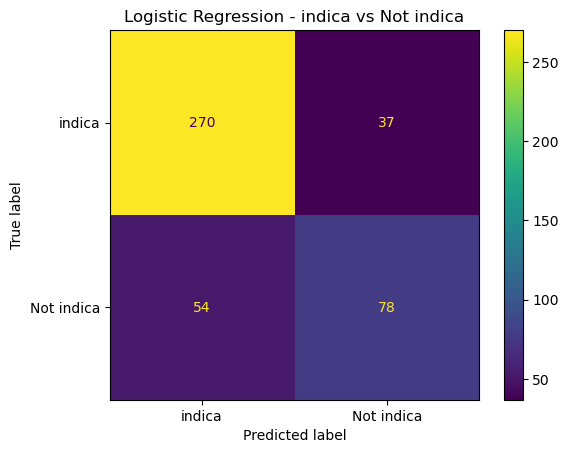


Training Logistic Regression for: sativa vs Not sativa
Confusion Matrix: 
 [[340  17]
 [ 54  28]]
Classification Report: 
               precision    recall  f1-score   support

      sativa       0.86      0.95      0.91       357
  Not sativa       0.62      0.34      0.44        82

    accuracy                           0.84       439
   macro avg       0.74      0.65      0.67       439
weighted avg       0.82      0.84      0.82       439



Training Logistic Regression for: sativa vs Not sativa
Confusion Matrix: 
 [[340  17]
 [ 54  28]]
Classification Report: 
               precision    recall  f1-score   support

      sativa       0.86      0.95      0.91       357
  Not sativa       0.62      0.34      0.44        82

    accuracy                           0.84       439
   macro avg       0.74      0.65      0.67       439
weighted avg       0.82      0.84      0.82       439



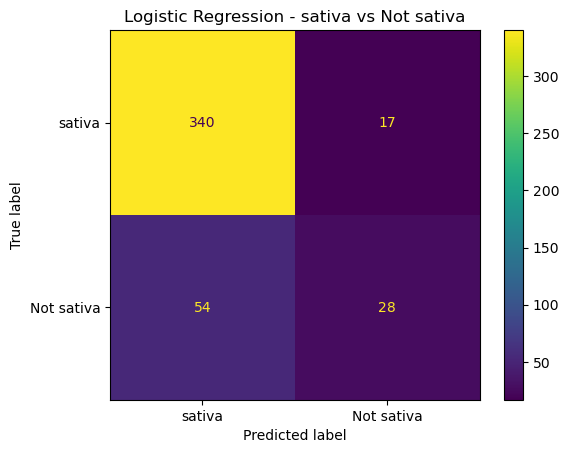

In [73]:
from sklearn.linear_model import LogisticRegression
# function for binary targets
def create_binary_target(y, target_class):
    return (y == target_class).astype(int)

# function to fit binary models
def fit_binary_models(models, X_train, X_test, y_train, y_test, target_names):
    results = {}
    for model_name, model in models.items():
        for idx, class_name in enumerate(target_names):
            print(f"\nTraining {model_name} for: {class_name} vs Not {class_name}")
            # binary targets
            y_train_binary = create_binary_target(y_train, idx)
            y_test_binary = create_binary_target(y_test, idx)
            #fit model
            model.fit(X_train, y_train_binary)
            # predictions
            predictions = model.predict(X_test)
            # results
            conf_matrix = confusion_matrix(y_test_binary, predictions)
            report = classification_report(y_test_binary, predictions, target_names=[f"{class_name}", f"Not {class_name}"])
            print("Confusion Matrix: \n", conf_matrix)
            print("Classification Report: \n", report)
            # plot confusion matrix
            ConfusionMatrixDisplay.from_predictions(
                y_test_binary, predictions, display_labels=[f"{class_name}", f"Not {class_name}"], cmap= "viridis"
            )
            plt.title(f"{model_name} - {class_name} vs Not {class_name}")
            plt.show()

            results[(model_name, class_name)] = {"conf_matrix": conf_matrix, "report": report}
    return results

binary_models = {
    "SVC": SVC(kernel="linear", probability=True, random_state=1),
    "Logistic Regression": LogisticRegression(random_state=1, max_iter=1000)
}
binary_results = fit_binary_models(binary_models, X_train, X_test, y_train, y_test, target_names=le.classes_)

### Q2: Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

The model that did the best job in distinguishing the target category from the rest is the logistic regression for sativa vs not sativa. This model had a recall of 95% that identified most of the sativa samples correctly. This makes sense because the sativa strain has a larger sample size and has more distinct features when compared to indica and hybrid strains. The model that did the worst is SVC for sativa vs not sativa. While SVC had a perfect reca of 100%, it had a precision of 0% meaning it failed it classify any not sativa samples correctly. This makes sense because SVC struggles to learn boundaires with the class imbalance. 

### Q3: Fit and report metrics for OvO versions of the models. That is, for each of the two model types, create three models:

* Indica vs. Sativa

* Indica vs. Hybrid

* Hybrid vs. Sativa


Training SVC for: hybrid vs indica


Training SVC for: hybrid vs indica


Confusion Matrix:
 [[ 92  45]
 [ 40 180]]
Classififcation Report:
               precision    recall  f1-score   support

      indica       0.70      0.67      0.68       137
      hybrid       0.80      0.82      0.81       220

    accuracy                           0.76       357
   macro avg       0.75      0.74      0.75       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix:
 [[ 92  45]
 [ 40 180]]
Classififcation Report:
               precision    recall  f1-score   support

      indica       0.70      0.67      0.68       137
      hybrid       0.80      0.82      0.81       220

    accuracy                           0.76       357
   macro avg       0.75      0.74      0.75       357
weighted avg       0.76      0.76      0.76       357



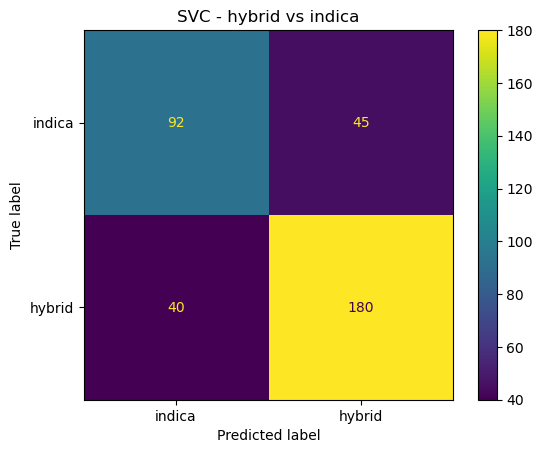


Training SVC for: hybrid vs sativa


Training SVC for: hybrid vs sativa


Confusion Matrix:
 [[ 28  53]
 [ 27 199]]
Classififcation Report:
               precision    recall  f1-score   support

      sativa       0.51      0.35      0.41        81
      hybrid       0.79      0.88      0.83       226

    accuracy                           0.74       307
   macro avg       0.65      0.61      0.62       307
weighted avg       0.72      0.74      0.72       307

Confusion Matrix:
 [[ 28  53]
 [ 27 199]]
Classififcation Report:
               precision    recall  f1-score   support

      sativa       0.51      0.35      0.41        81
      hybrid       0.79      0.88      0.83       226

    accuracy                           0.74       307
   macro avg       0.65      0.61      0.62       307
weighted avg       0.72      0.74      0.72       307



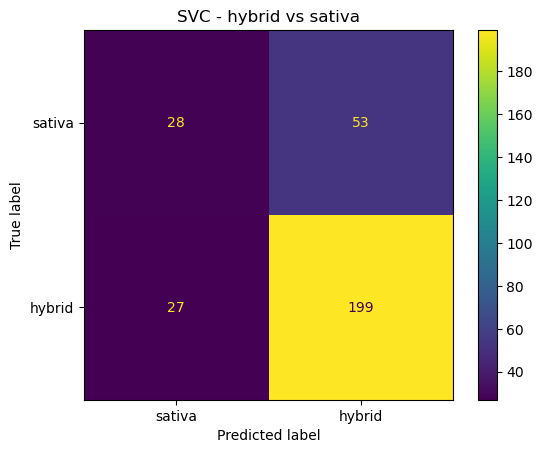


Training SVC for: indica vs sativa


Training SVC for: indica vs sativa


Confusion Matrix:
 [[ 64  17]
 [ 14 119]]
Classififcation Report:
               precision    recall  f1-score   support

      sativa       0.82      0.79      0.81        81
      indica       0.88      0.89      0.88       133

    accuracy                           0.86       214
   macro avg       0.85      0.84      0.84       214
weighted avg       0.85      0.86      0.85       214

Confusion Matrix:
 [[ 64  17]
 [ 14 119]]
Classififcation Report:
               precision    recall  f1-score   support

      sativa       0.82      0.79      0.81        81
      indica       0.88      0.89      0.88       133

    accuracy                           0.86       214
   macro avg       0.85      0.84      0.84       214
weighted avg       0.85      0.86      0.85       214



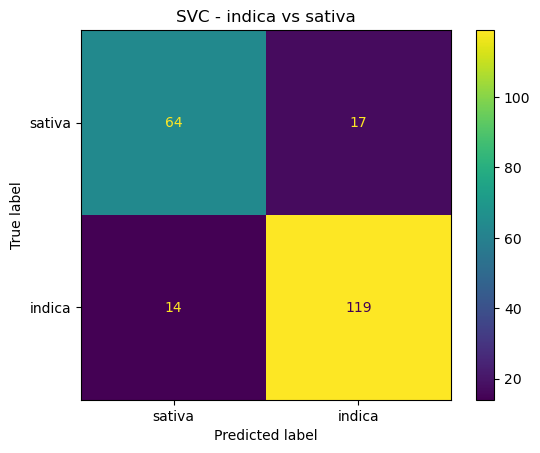


Training Logistic Regression for: hybrid vs indica


Training Logistic Regression for: hybrid vs indica


Confusion Matrix:
 [[ 89  48]
 [ 36 184]]
Classififcation Report:
               precision    recall  f1-score   support

      indica       0.71      0.65      0.68       137
      hybrid       0.79      0.84      0.81       220

    accuracy                           0.76       357
   macro avg       0.75      0.74      0.75       357
weighted avg       0.76      0.76      0.76       357

Confusion Matrix:
 [[ 89  48]
 [ 36 184]]
Classififcation Report:
               precision    recall  f1-score   support

      indica       0.71      0.65      0.68       137
      hybrid       0.79      0.84      0.81       220

    accuracy                           0.76       357
   macro avg       0.75      0.74      0.75       357
weighted avg       0.76      0.76      0.76       357



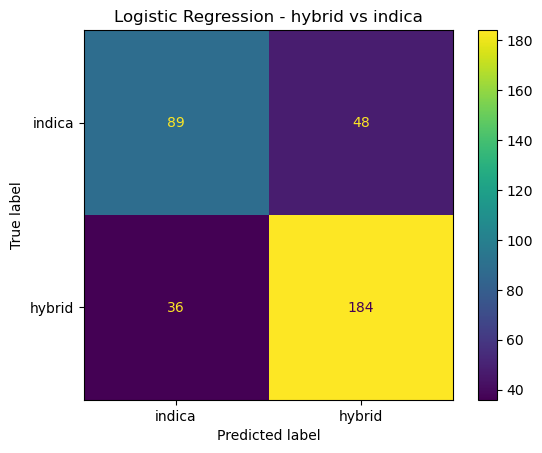


Training Logistic Regression for: hybrid vs sativa
Confusion Matrix:
 [[ 29  52]
 [ 26 200]]
Classififcation Report:
               precision    recall  f1-score   support

      sativa       0.53      0.36      0.43        81
      hybrid       0.79      0.88      0.84       226

    accuracy                           0.75       307
   macro avg       0.66      0.62      0.63       307
weighted avg       0.72      0.75      0.73       307



Training Logistic Regression for: hybrid vs sativa
Confusion Matrix:
 [[ 29  52]
 [ 26 200]]
Classififcation Report:
               precision    recall  f1-score   support

      sativa       0.53      0.36      0.43        81
      hybrid       0.79      0.88      0.84       226

    accuracy                           0.75       307
   macro avg       0.66      0.62      0.63       307
weighted avg       0.72      0.75      0.73       307



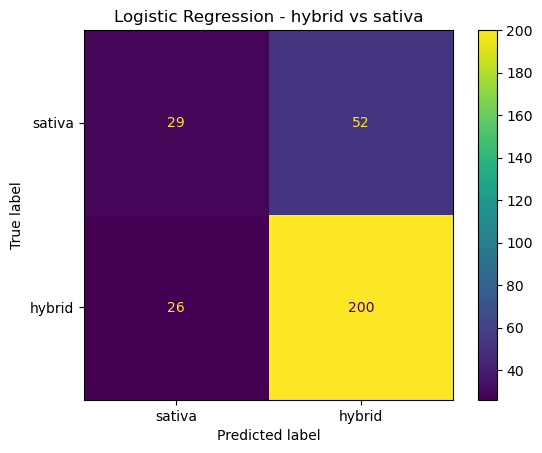


Training Logistic Regression for: indica vs sativa
Confusion Matrix:
 [[ 67  14]
 [ 12 121]]
Classififcation Report:
               precision    recall  f1-score   support

      sativa       0.85      0.83      0.84        81
      indica       0.90      0.91      0.90       133

    accuracy                           0.88       214
   macro avg       0.87      0.87      0.87       214
weighted avg       0.88      0.88      0.88       214



Training Logistic Regression for: indica vs sativa
Confusion Matrix:
 [[ 67  14]
 [ 12 121]]
Classififcation Report:
               precision    recall  f1-score   support

      sativa       0.85      0.83      0.84        81
      indica       0.90      0.91      0.90       133

    accuracy                           0.88       214
   macro avg       0.87      0.87      0.87       214
weighted avg       0.88      0.88      0.88       214



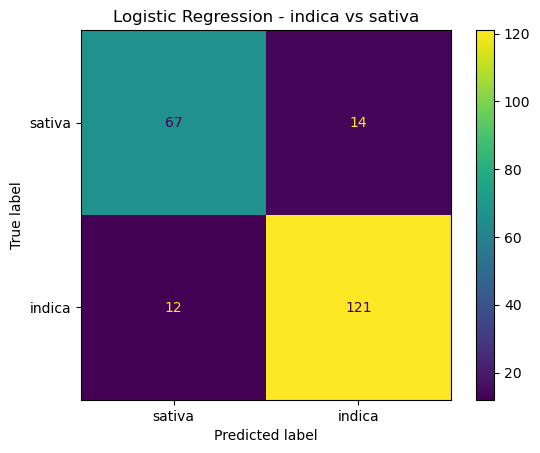

In [74]:
# function to create subsets
def create_ovo_subset(X, y, class1, class2):
    mask = (y == class1) | (y == class2)
    X_ovo = X[mask]
    y_ovo = y[mask]
    return X_ovo, y_ovo

# function to fit models
def fit_ovo_models(models, X, y, class_pairs, target_names):
    results = {}
    for model_name, model in models.items():
        for (class1, class2) in class_pairs:
            print(f"\nTraining {model_name} for: {target_names[class1]} vs {target_names[class2]}")
            X_ovo, y_ovo = create_ovo_subset(X, y, class1, class2)
            y_ovo_binary = (y_ovo == class1).astype(int)
            X_train, X_test, y_train, y_test = train_test_split(X_ovo, y_ovo_binary, test_size = 0.2, random_state = 1)
            # fit model
            model.fit(X_train, y_train)
            # predictions
            predictions = model.predict(X_test)
            # results
            conf_matrix = confusion_matrix(y_test, predictions)
            report = classification_report(y_test, predictions, target_names=[target_names[class2], target_names[class1]])
            print("Confusion Matrix:\n", conf_matrix)
            print("Classififcation Report:\n", report)
            # plot confusion matrix
            ConfusionMatrixDisplay.from_predictions(
                y_test, predictions, display_labels=[target_names[class2], target_names[class1]], cmap="viridis"
            )
            plt.title(f"{model_name} - {target_names[class1]} vs {target_names[class2]}")
            plt.show()
            # results
            results[(model_name, f"{target_names[class1]} vs {target_names[class2]}")] = {
                "conf_matrix": conf_matrix,
                "report": report
            }
    return results

# define class pairs
class_pairs = [(0,1), (0,2), (1,2)]
# define models
ovo_models = {
    "SVC": SVC(kernel="linear", probability=True, random_state=1),
    "Logistic Regression": LogisticRegression(random_state=1, max_iter=1000)
}
ovo_results = fit_ovo_models(ovo_models, X, y, class_pairs, target_names=le.classes_)

### Q4: Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

### Q5: Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach? What about for SVC?